# Getting Started

This Jupyter notebook is a short demonstration of Python for scientific data analysis.
It covers the following points:

* Plotting a sine wave
* Generating a column matrix of data
* Writing data to a text-file, and reading data from a text-file
* Waiting for a button-press to continue the program exectution
* Using a dictionary, which is similar to MATLAB structures
* Extracting data which fulfill a certain condition
* Calculating the best-fit-line to noisy data
* Formatting text-output
* Waiting for a keyboard-press
* Calculating confidence intervals for line-fits
* Saving figures

author: Thomas Haslwanter
date:   Dec-2019

# Modules and Packages

In contrast to MATLAB, you explicitly have to load the modules that you need.
And don't worry here about not knowing the right modules: *numpy*, *scipy*, and
*matplotlib.pyplot* are almost everything you will need most of the time, and you
will quickly get used to those.

# Sine Wave

In [5]:
# Note: single comment lines are indicated by "#".

# Create a sine-wave
t = np.arange(0,10,0.1)
x = np.sin(t)

# The basic numerical functions, as well as everything with vector ans matrices 
# is in the package "numpy".

# Next, save the data in a text-file, in column form.
out_file = 'test.txt'
np.savetxt(out_file, np.column_stack([t,x]) )

# For displaying formatted text, the "format-strings" introduced in Python 3.5
# are definitely the most elegant way: they allow to use known variables directly
# in the "print"-statement
print(f'Data have been saved to {out_file}.')

Data have been saved to test.txt.


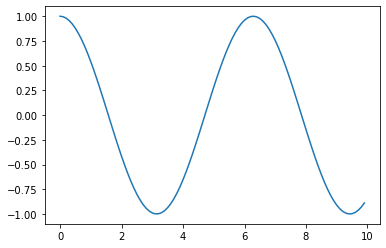

In [7]:
# Read the data into a different variable
inData = np.loadtxt(out_file)
t2 = inData[:,0] # Note that Python starts at "0"!
x2 = inData[:,1]

# Note: Python used (...) for function arguments, and [...] for indexing.

# Plot the data
plt.plot(t, np.cos(t))

# Rotating a Vector

When working with vectors and matrices, keep the following things in mind
* By default, data are vectors.
* Use *array* when you want to generate matrices.

# Noisy Data and Linefits

Fit the following function: $y = k*x + d$

In [11]:
# Generate a noisy line
t = np.arange(-100, 100)

# use a Python "dictionary" for named variables
par = {'offset':100, 'slope':0.5, 'noiseAmp':4}

# Everything with random numbers is in the numpy sub-package "np.random"
x = par['offset'] + par['slope']*t + par['noiseAmp']*np.random.randn(len(t))

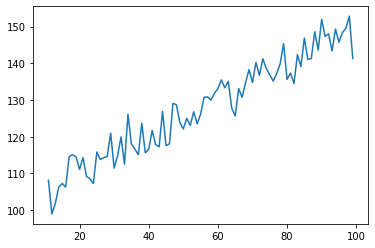

In [12]:
# Boolean indexing works in Python: select "late" values, i.e. with t>10
x_high = x[t>10]
t_high = t[t>10]

# Plot the "late" data
plt.plot(t_high, x_high)

In [13]:
# Boolean indices can be combined:
x = np.arange(10)
top_range = x>2
bottom_range = x<8
x[top_range & bottom_range]

array([3, 4, 5, 6, 7])

   ## Fitting a line to the data

In [33]:
# Determine the best-fit line
# To do so, you have to generate a so-called Design Matrix, with "time" in the first
# column, and a column of "1" in the second column:
x_mat = np.column_stack( [t_high, np.ones(len(t_high))])

# A numerical detail: For the least-squares solution to a linear matrix equation,
# the optional parameter "rcond" determines how  small singular values
# of the matrix are handled.
slope, intercept = np.linalg.lstsq(x_mat, x_high, rcond=None)[0]

Fit line: intercept = {intercept:5.3f}, and slope = {slope:5.3f}


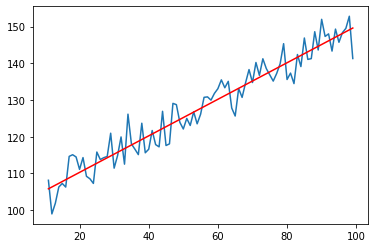

In [34]:
# Show and plot the fit, and save it to a PNG-file with a medium resolution.
# The "modern" way of Python-formatting is used
plt.plot(t_high, x_high)
plt.plot(t_high, intercept + slope*t_high, 'r')
plt.savefig('linefit.png', dpi=200)
print(r'Fit line: intercept = {intercept:5.3f}, and slope = {slope:5.3f}')

# Pandas

In [31]:
# If you want to know confidence intervals, best switch to *pandas*
# Pandas is mainly used for statistics and worksheet-like data
import pandas as pd

# The calculation of OLS has been moved to *statsmodels* now
import statsmodels.formula.api as smf

# Note that this is an advanced topic, and requires new data structures
# such ad "DataFrames" and "ordinary-least-squares" or "ols-models".
my_dict = {'x':t_high, 'y':x_high}
df = pd.DataFrame(my_dict)
model = smf.ols('y~x', df).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.923   
Dependent Variable: y                AIC:                487.9307
Date:               2019-12-04 14:50 BIC:                492.9079
No. Observations:   89               Log-Likelihood:     -241.97 
Df Model:           1                F-statistic:        1055.   
Df Residuals:       87               Prob (F-statistic): 2.00e-50
R-squared:          0.924            Scale:              13.767  
------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025   0.975] 
------------------------------------------------------------------
Intercept  100.3568    0.9293  107.9880  0.0000  98.5097  102.2040
x            0.4974    0.0153   32.4875  0.0000   0.4669    0.5278
-----------------------------------------------------------------
Omnibus:              2.854        Durbin-Watson:           1.930
Prob(Omnibus):        

# More Python Info on the Web

[http://scipy-lectures.github.com/](http://scipy-lectures.github.com/) Python Scientifc Lecture Notes. **If you read nothing else, read this!**

[https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) Start here if you have lots of Matlab experience.

[https://docs.python.org/3.7/tutorial/](https://docs.python.org/3.6/tutorial/) The Python tutorial. The original introduction.

[http://jrjohansson.github.com/](http://jrjohansson.github.com/) Lectures on scientic computing with Python. Great ipython notebooks!